In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
def plot_sample(index):
  plt.figure(figsize = (10,1))
  plt.imshow(x_train[index])

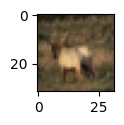

In [ ]:
plot_sample(3)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[y_train[3][0]]

'deer'

In [ ]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [ ]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
])


model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 19s 8ms/step - loss: 1.8148 - accuracy: 0.3527
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6237 - accuracy: 0.4265
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5440 - accuracy: 0.4542
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4840 - accuracy: 0.4774
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4346 - accuracy: 0.4956
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3913 - accuracy: 0.5129
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3523 - accuracy: 0.5258
Epoch 8/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3171 - accuracy: 0.5358
Epoch 9/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2852 - accuracy: 0.5496
Epoch 10/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2

In [ ]:
classes[np.argmax(model.predict(x_test_scaled)[2])]

313/313 [==============================] - 1s 4ms/step


'ship'

In [ ]:
classes[y_test[2][0]]

'ship'